# Finding interrelations of the UN SDG Targets and impute missing observations

### This project is divided into two major phases: 
1. It is intended to find cliques within the [UN SDG](https://sustainabledevelopment.un.org/?menu=1300) Targets.
2. Within one of the found cliques, missing observations of the time-series are inferred

Each Target has at least one quantitatively measurable Indicator associated whose measurements from 1984 to 2017 serve as our data points. The data set we are working with is for the entire world, i.e. the values presented are means over all countries. Regarding the first phase, for a more sophisticated analysis, but out of scope of this course, correlations in each country should be analysed separately.

<img src="Screenshot from 2018-04-19 10-08-40.png">

## 1. Find cliques

Import necessary packages and load our data set

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pystan
import os

In [2]:
# load csv
df = pd.read_csv("TargetsForAnalysis.csv")
df.head()

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,106,Population,Proportion of population below the internation...,1,1.1,1.1.1,Percent,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN
1,107,Population,Proportion of population covered by social pro...,1,1.3,1.3.1,Percent,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.17,NaN
2,108,Population,Proportion of population covered by social pro...,1,1.3,1.3.1,Percent,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.86,NaN
3,109,Population,Proportion of population covered by social pro...,1,1.3,1.3.1,Percent,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.79,NaN
4,110,Population,Proportion of population covered by social pro...,1,1.3,1.3.1,Percent,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.08,NaN


In [3]:
df_new = df.add

In [4]:
years = df[['2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017']]
print(years)
def getnumberofyearswithdata(r):
    n = 0
    for year in years:
        if r[year] != 0:
            n+=1
    return n

            2005          2006          2007          2008          2009  \
0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   1.691000e+01  1.697000e+01  1.691000e+01  1.714000e+01  1.771000e+01   
2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
8   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
9   0.000000e+00  5.151000e+01  0.000000e+00  5.283000e+01  5.747000e+01   
10  0.000000e+00  2.052000e+01  0.000000e+00  1.468000e+01  1.266000e+01   
11  0.000000e+00  2.797000e+01  0.000000e+00  3.249000e+01  2.987000e+01   
12  0.000000

In [5]:
df['Years with values'] = df.apply(getnumberofyearswithdata, axis=1)

In [6]:
df.head()

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,Latest Value,Years with values
0,37,Environment (Percent),Level of water stress: freshwater withdrawal a...,6,6.4,6.4.2,Percent,Units,0.00,0.00,...,0.00,0.00,0.00,0.00,12.70,0.0,0.0,0.00,12.70,1
1,38,Environment (Percent),Renewable energy share in the total final ener...,7,7.2,7.2.1,Percent,Units,16.91,16.97,...,17.51,17.54,17.91,18.19,18.33,0.0,0.0,0.00,18.33,10
2,39,Environment (percent),Proportion of urban solid waste regularly coll...,11,11.6,11.6.1,Percent,Units,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,65.20,65.20,1
3,40,Environment (percent),Proportion of urban solid waste regularly coll...,11,11.6,11.6.1,Percent,Units,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,64.10,64.10,1
4,41,Environment (percent),Proportion of urban solid waste regularly coll...,11,11.6,11.6.1,Percent,Units,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,68.14,68.14,1


In [7]:
df_new = df.loc[df['Years with values'] > 1]

df_new.shape
df_new

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,Latest Value,Years with values
1,38,Environment (Percent),Renewable energy share in the total final ener...,7,7.2,7.2.1,Percent,Units,1.691000e+01,1.697000e+01,...,1.751000e+01,1.754000e+01,1.791000e+01,1.819000e+01,1.833000e+01,0.000000e+00,0.00,0.00,1.833000e+01,10
9,46,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,5.151000e+01,...,0.000000e+00,6.128000e+01,0.000000e+00,5.811000e+01,0.000000e+00,0.000000e+00,0.00,0.00,5.811000e+01,5
10,47,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,2.052000e+01,...,0.000000e+00,9.980000e+00,0.000000e+00,1.053000e+01,0.000000e+00,0.000000e+00,0.00,0.00,1.053000e+01,5
11,48,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,2.797000e+01,...,0.000000e+00,2.874000e+01,0.000000e+00,3.136000e+01,0.000000e+00,0.000000e+00,0.00,0.00,3.136000e+01,5
12,49,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,7.203000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,6.864000e+01,0.000000e+00,0.000000e+00,0.00,0.00,6.864000e+01,3
13,50,Environment (percent),Coverage of protected areas in relation to mar...,14,14.5,14.5.1,Percent,Units,2.890000e+00,0.000000e+00,...,7.440000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.192000e+01,12.74,0.00,1.274000e+01,4
14,53,Environment (percent),Forest area as a proportion of total land area,15,15.1,15.1.1,Percent,Units,3.091000e+01,0.000000e+00,...,3.077000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.065000e+01,0.00,0.00,3.065000e+01,3
15,56,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13
16,57,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13
17,58,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13


In [8]:
e = list(df_new['Target'])
type(e[2])

numpy.float64

In [9]:
df_new['Target'] = df_new.apply(lambda x: str(x['Target']), axis=1)

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#list(df_new['Target'])

In [11]:
df_new

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,Latest Value,Years with values
1,38,Environment (Percent),Renewable energy share in the total final ener...,7,7.2,7.2.1,Percent,Units,1.691000e+01,1.697000e+01,...,1.751000e+01,1.754000e+01,1.791000e+01,1.819000e+01,1.833000e+01,0.000000e+00,0.00,0.00,1.833000e+01,10
9,46,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,5.151000e+01,...,0.000000e+00,6.128000e+01,0.000000e+00,5.811000e+01,0.000000e+00,0.000000e+00,0.00,0.00,5.811000e+01,5
10,47,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,2.052000e+01,...,0.000000e+00,9.980000e+00,0.000000e+00,1.053000e+01,0.000000e+00,0.000000e+00,0.00,0.00,1.053000e+01,5
11,48,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,2.797000e+01,...,0.000000e+00,2.874000e+01,0.000000e+00,3.136000e+01,0.000000e+00,0.000000e+00,0.00,0.00,3.136000e+01,5
12,49,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0.000000e+00,7.203000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,6.864000e+01,0.000000e+00,0.000000e+00,0.00,0.00,6.864000e+01,3
13,50,Environment (percent),Coverage of protected areas in relation to mar...,14,14.5,14.5.1,Percent,Units,2.890000e+00,0.000000e+00,...,7.440000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.192000e+01,12.74,0.00,1.274000e+01,4
14,53,Environment (percent),Forest area as a proportion of total land area,15,15.1,15.1.1,Percent,Units,3.091000e+01,0.000000e+00,...,3.077000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.065000e+01,0.00,0.00,3.065000e+01,3
15,56,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13
16,57,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13
17,58,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,3.858000e+01,3.942000e+01,...,4.193000e+01,4.218000e+01,4.270000e+01,4.301000e+01,4.319000e+01,4.323000e+01,43.23,43.23,4.323000e+01,13


In [12]:
targets = list(set(df_new['Target']))
targets

['14.5', '15.4', '15.1', '15.2', '14.4', '7.2', '12.2', '9.4', '8.4']

In [13]:
target_dfs = {}

In [14]:
for t in targets:
    target_dfs[t] = df_new[df_new['Target']==t]

In [15]:
target_dfs['12.2']

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,Latest Value,Years with values
35,77,Environment (Tonnes),"Material footprint, material footprint per cap...",12,12.2,12.2.1,Metric Tons,Units,9.100000e+00,9.420000e+00,...,1.010000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.010000e+01,6
36,78,Environment (Tonnes),"Material footprint, material footprint per cap...",12,12.2,12.2.1,Metric Tons,Units,1.260000e-03,1.270000e-03,...,1.330000e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.330000e-03,6
37,79,Environment (Tonnes),"Material footprint, material footprint per cap...",12,12.2,12.2.1,Metric Tons,Units,5.867280e+16,6.156110e+16,...,6.932903e+16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.932903e+16,6
41,83,Environment (Tonnes),"Domestic material consumption, domestic materi...",12,12.2,12.2.2,Metric Tons,Units,9.020000e+00,9.350000e+00,...,1.006000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.006000e+01,6
42,84,Environment (Tonnes),"Domestic material consumption, domestic materi...",12,12.2,12.2.2,Metric Tons,Units,1.280000e-03,1.290000e-03,...,1.330000e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.330000e-03,6
43,85,Environment (Tonnes),"Domestic material consumption, domestic materi...",12,12.2,12.2.2,Metric Tons,Units,5.994788e+16,6.289511e+16,...,7.099971e+16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.099971e+16,6


In [16]:
max_dfrows = {}

In [17]:
for target in targets:
    if target_dfs[target].shape[0] > 1:
        max_dfrows[target] = target_dfs[target].loc[target_dfs[target]['Years with values'].idxmax()].to_frame().T
    else:
        max_dfrows[target]=target_dfs[target]

In [18]:
max_dfrows

{'12.2':    Unnamed: 0              Category  \
 35         77  Environment (Tonnes)   
 
                                 Indicator Description Goal Target  \
 35  Material footprint, material footprint per cap...   12   12.2   
 
    Indicator Ref         Unit Unit multiplier 2005  2006        ...         \
 35        12.2.1  Metric Tons           Units  9.1  9.42        ...          
 
     2010 2011 2012 2013 2014 2015 2016 2017 Latest Value Years with values  
 35  10.1    0    0    0    0    0    0    0         10.1                 6  
 
 [1 rows x 23 columns], '14.4':   Unnamed: 0               Category  \
 9         46  Environment (percent)   
 
                                Indicator Description Goal Target  \
 9  Proportion of fish stocks within biologically ...   14   14.4   
 
   Indicator Ref     Unit Unit multiplier 2005   2006        ...        2010  \
 9        14.4.1  Percent           Units    0  51.51        ...           0   
 
     2011 2012   2013 2014 2015 201

In [19]:
frames = list(max_dfrows[target] for target in targets)
frames

[    Unnamed: 0               Category  \
 13          50  Environment (percent)   
 
                                 Indicator Description  Goal Target  \
 13  Coverage of protected areas in relation to mar...    14   14.5   
 
    Indicator Ref     Unit Unit multiplier  2005  2006        ...          \
 13        14.5.1  Percent           Units  2.89   0.0        ...           
 
     2010  2011  2012  2013  2014   2015   2016  2017  Latest Value  \
 13  7.44   0.0   0.0   0.0   0.0  11.92  12.74   0.0         12.74   
 
     Years with values  
 13                  4  
 
 [1 rows x 23 columns],    Unnamed: 0               Category  \
 21         62  Environment (Percent)   
 
                                 Indicator Description Goal Target  \
 21  Coverage by protected areas of important sites...   15   15.4   
 
    Indicator Ref     Unit Unit multiplier   2005   2006        ...         \
 21        15.4.1  Percent           Units  42.92  44.14        ...          
 
      2010 

In [20]:
final_df = pd.concat(frames, axis=0)

In [21]:
final_df

,Unnamed: 0,Category,Indicator Description,Goal,Target,Indicator Ref,Unit,Unit multiplier,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,Latest Value,Years with values
13,50,Environment (percent),Coverage of protected areas in relation to mar...,14,14.5,14.5.1,Percent,Units,2.89,0,...,7.44,0,0,0,0,11.92,12.74,0,12.74,4
21,62,Environment (Percent),Coverage by protected areas of important sites...,15,15.4,15.4.1,Percent,Units,42.92,44.14,...,46.99,47.55,48.41,48.82,48.99,49.03,49.06,49.06,49.06,13
15,56,Environment (percent),Proportion of important sites for terrestrial ...,15,15.1,15.1.2,Percent,Units,38.58,39.42,...,41.93,42.18,42.7,43.01,43.19,43.23,43.23,43.23,43.23,13
27,102,Environment (Tonnes),Progress towards sustainable forest management,15,15.2,15.2.1,Percent,Units,0,0,...,7.09,0,0,0,11.01,0,0,0,11.01,2
9,46,Environment (percent),Proportion of fish stocks within biologically ...,14,14.4,14.4.1,Percent,Units,0,51.51,...,0,61.28,0,58.11,0,0,0,0,58.11,5
1,38,Environment (Percent),Renewable energy share in the total final ener...,7,7.2,7.2.1,Percent,Units,16.91,16.97,...,17.51,17.54,17.91,18.19,18.33,0,0,0,18.33,10
35,77,Environment (Tonnes),"Material footprint, material footprint per cap...",12,12.2,12.2.1,Metric Tons,Units,9.1,9.42,...,10.1,0,0,0,0,0,0,0,10.1,6
49,95,Environment (Tonnes),CO2 emission per unit of value added,9,9.4,9.4.1,Metric Tons,Units,2.70377e+10,2.78903e+10,...,3.04504e+10,3.13544e+10,3.15929e+10,3.21294e+10,3.2381e+10,0,0,0,3.2381e+10,10
32,74,Environment (Tonnes),"Material footprint, material footprint per cap...",8,8.4,8.4.1,Metric Tons,Units,9.1,9.42,...,10.1,0,0,0,0,0,0,0,10.1,6


### clean-up data frames

In [22]:
# Drop unused columns, transpose 
final_df.drop(['Unnamed: 0', 'Category', 'Indicator Description', 'Goal', 'Indicator Ref', 'Unit',
              'Unit multiplier', 'Latest Value', 'Years with values'], inplace=True, axis=1)

final_df = final_df.set_index('Target')

final_t = final_df.T

targets = list(final_t.columns)

In [23]:
final_t

Target,14.5,15.4,15.1,15.2,14.4,7.2,12.2,9.4,8.4
2005,2.89,42.92,38.58,0,0,16.91,9.1,2.70377e+10,9.1
2006,0,44.14,39.42,0,51.51,16.97,9.42,2.78903e+10,9.42
2007,0,45.24,40.73,0,0,16.91,9.8,2.89898e+10,9.8
2008,0,45.95,41.28,0,52.83,17.14,9.78,2.91648e+10,9.78
2009,0,46.51,41.7,0,57.47,17.71,9.69,2.87486e+10,9.69
2010,7.44,46.99,41.93,7.09,0,17.51,10.1,3.04504e+10,10.1
2011,0,47.55,42.18,0,61.28,17.54,0,3.13544e+10,0
2012,0,48.41,42.7,0,0,17.91,0,3.15929e+10,0
2013,0,48.82,43.01,0,58.11,18.19,0,3.21294e+10,0
2014,0,48.99,43.19,11.01,0,18.33,0,3.2381e+10,0


In [24]:
final_t.replace(0, np.nan, inplace=True)
final_t_shuffled = final_t.sample(frac=1).reset_index(drop=True)
final_t_shuffled

Target,14.5,15.4,15.1,15.2,14.4,7.2,12.2,9.4,8.4
0,11.92,49.03,43.23,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,46.51,41.70,NaN,57.47,17.71,9.69,2.874857e+10,9.69
2,NaN,45.24,40.73,NaN,NaN,16.91,9.80,2.898975e+10,9.80
3,NaN,49.06,43.23,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.55,42.18,NaN,61.28,17.54,NaN,3.135439e+10,NaN
5,NaN,48.99,43.19,11.01,NaN,18.33,NaN,3.238104e+10,NaN
6,NaN,48.82,43.01,NaN,58.11,18.19,NaN,3.212937e+10,NaN
7,12.74,49.06,43.23,NaN,NaN,NaN,NaN,NaN,NaN
8,7.44,46.99,41.93,7.09,NaN,17.51,10.10,3.045036e+10,10.10
9,NaN,44.14,39.42,NaN,51.51,16.97,9.42,2.789030e+10,9.42


### R-squared value of linear regression to detect connections

In [25]:
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import Imputer

mask_train = ~np.isnan(targets_X_train) & ~np.isnan(targets_Y_train)
print(mask_train)
targets_X_train = final_t_shuffled[targetx][:-6].reshape(-1, 1)
print(targets_X_train)
print(targets_X_train[mask_train])

<class 'pandas.core.series.Series'>
Train var [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation var [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation var [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation var

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


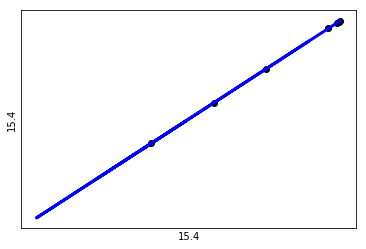

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


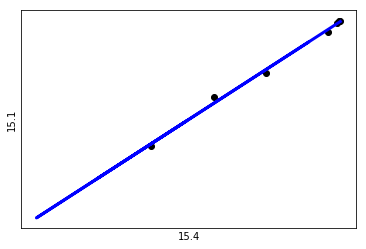

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>


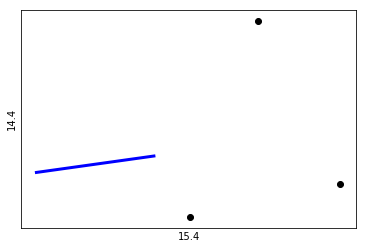

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>


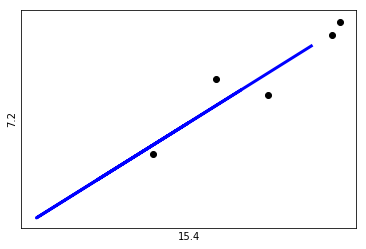

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


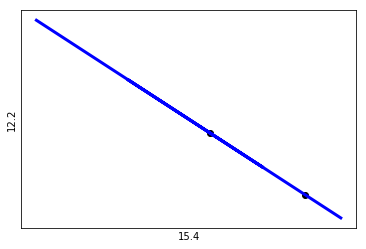

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


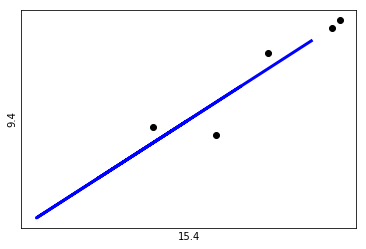

<class 'pandas.core.series.Series'>
Train var [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation var [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


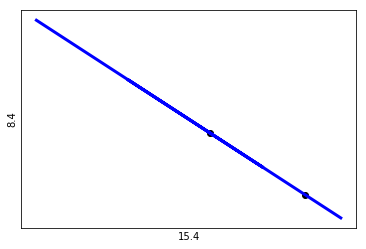

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>


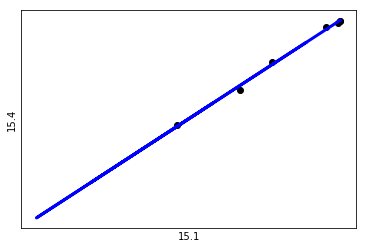

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


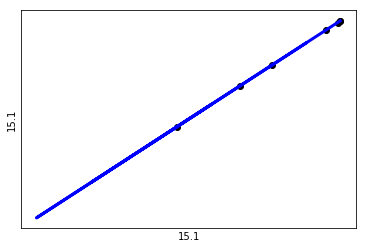

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>


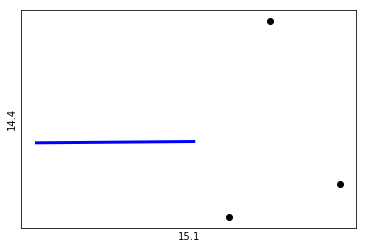

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>


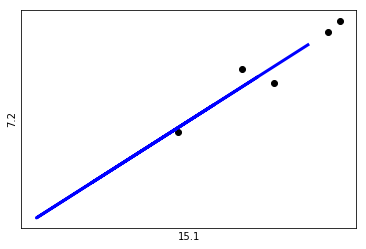

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


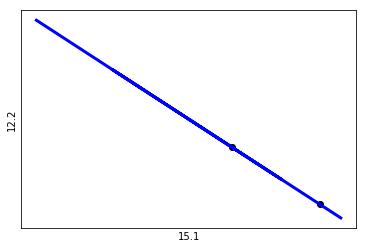

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


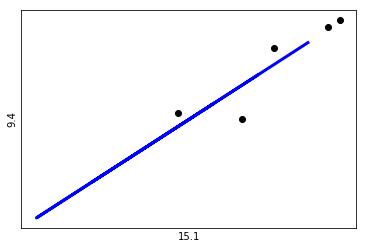

<class 'pandas.core.series.Series'>
Train var [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation var [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


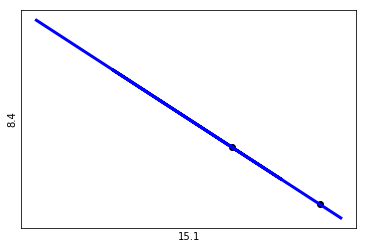

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation var [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation var [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation var [[ nan]
 [7

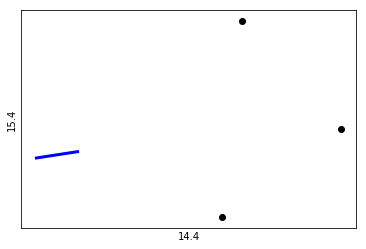

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


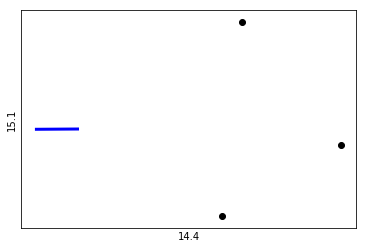

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>


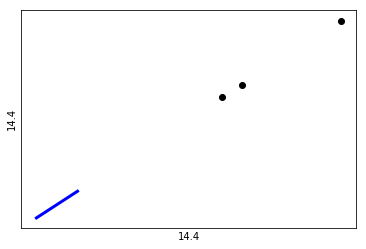

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>


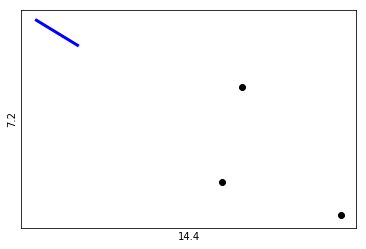

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


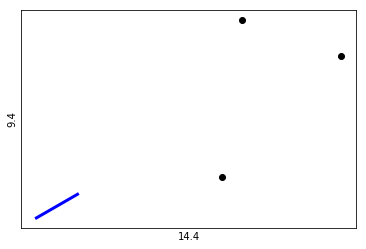

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  na

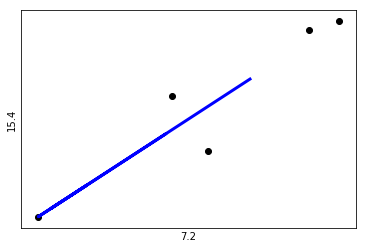

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


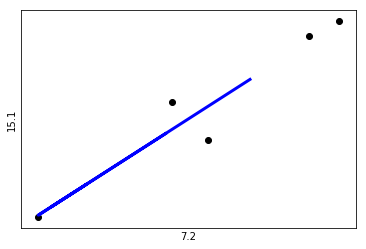

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>


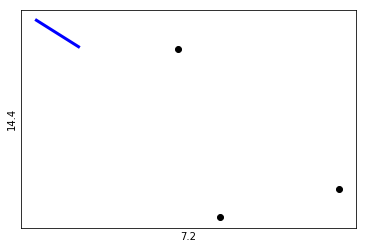

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>


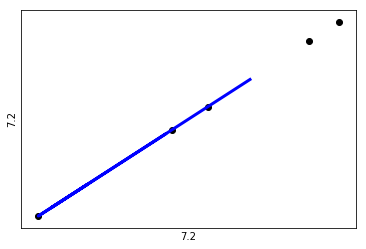

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


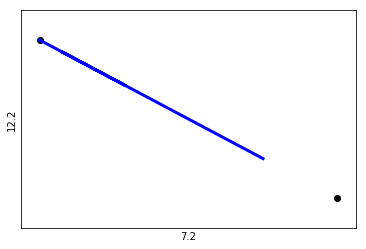

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


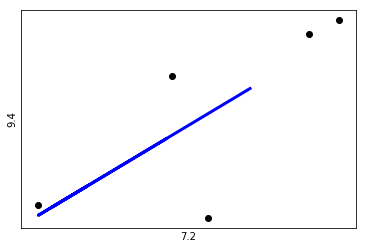

<class 'pandas.core.series.Series'>
Train var [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


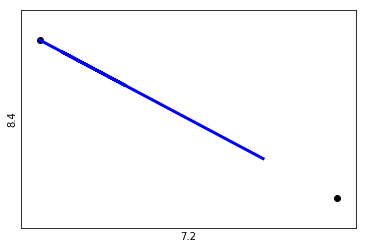

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>


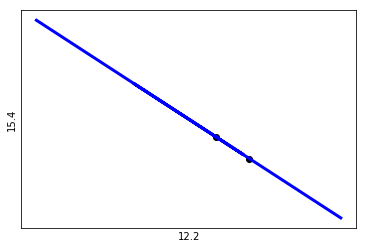

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


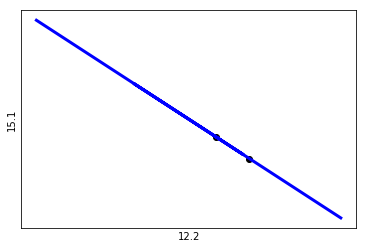

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]

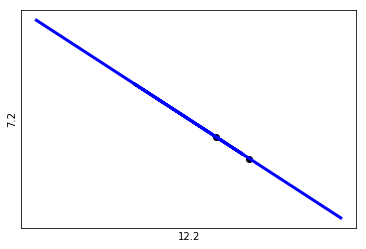

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


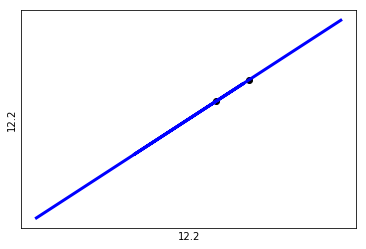

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


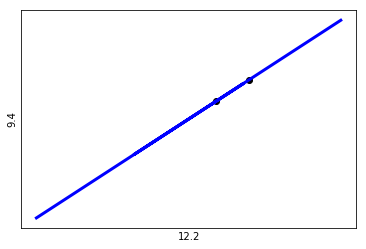

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


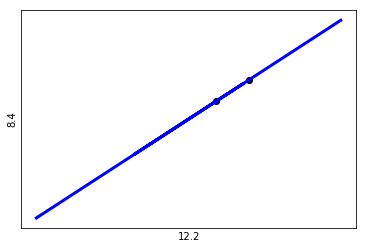

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]


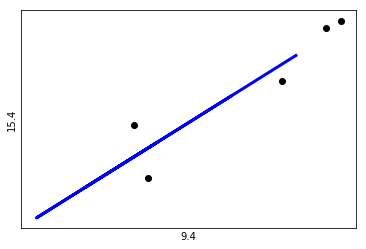

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


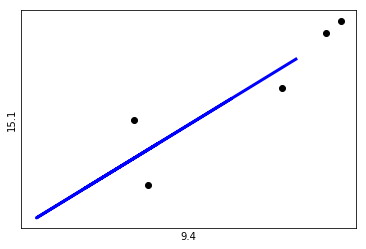

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  na

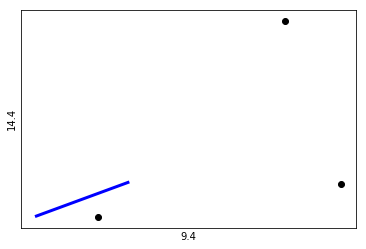

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[  nan]
 [17.71]
 [16.91]
 [  nan]
 [17.54]
 [18.33]
 [18.19]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [17.51]
 [16.97]
 [17.14]
 [16.91]
 [17.91]] <class 'numpy.ndarray'>


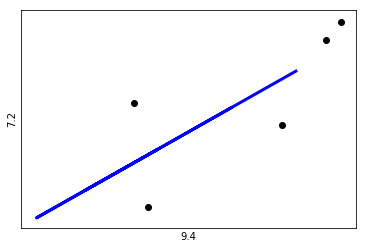

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


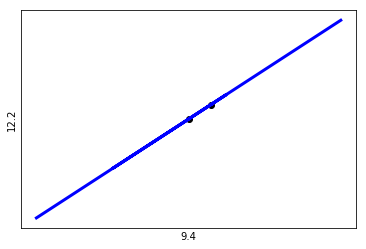

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


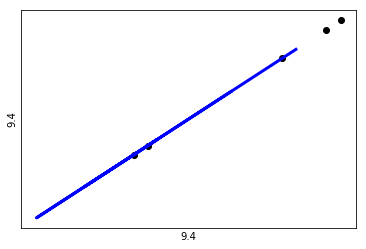

<class 'pandas.core.series.Series'>
Train var [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation var [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


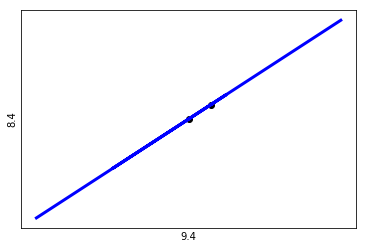

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[11.92]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[12.74]
 [ 7.44]
 [  nan]
 [  nan]
 [ 2.89]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[49.03]
 [46.51]
 [45.24]
 [49.06]
 [47.55]
 [48.99]
 [48.82]] <class 'numpy.ndarray'>
Validation target [[49.06]
 [46.99]
 [44.14]
 [45.95]
 [42.92]
 [48.41]] <class 'numpy.ndarray'>


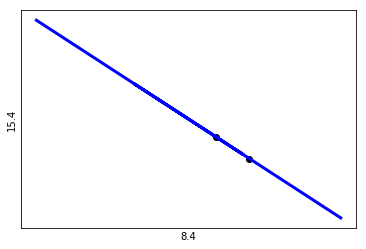

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[43.23]
 [41.7 ]
 [40.73]
 [43.23]
 [42.18]
 [43.19]
 [43.01]] <class 'numpy.ndarray'>
Validation target [[43.23]
 [41.93]
 [39.42]
 [41.28]
 [38.58]
 [42.7 ]] <class 'numpy.ndarray'>


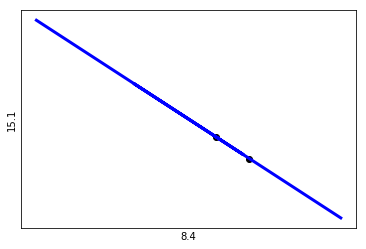

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [11.01]
 [  nan]] <class 'numpy.ndarray'>
Validation target [[ nan]
 [7.09]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[  nan]
 [57.47]
 [  nan]
 [  nan]
 [61.28]
 [  nan]
 [58.11]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [  nan]
 [51.51]
 [52.83]
 [  nan]
 [  nan]] <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]

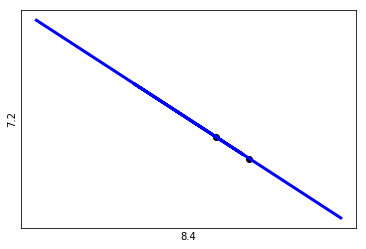

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


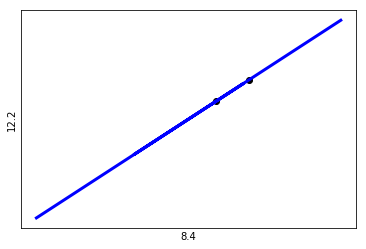

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[         nan]
 [2.874857e+10]
 [2.898975e+10]
 [         nan]
 [3.135439e+10]
 [3.238104e+10]
 [3.212937e+10]] <class 'numpy.ndarray'>
Validation target [[         nan]
 [3.045036e+10]
 [2.789030e+10]
 [2.916480e+10]
 [2.703774e+10]
 [3.159291e+10]] <class 'numpy.ndarray'>


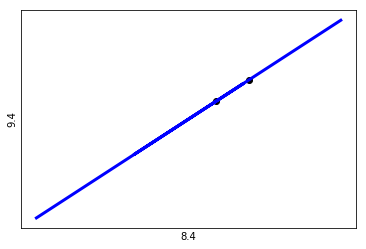

<class 'pandas.core.series.Series'>
Train var [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation var [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>
Train target [[ nan]
 [9.69]
 [9.8 ]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] <class 'numpy.ndarray'>
Validation target [[  nan]
 [10.1 ]
 [ 9.42]
 [ 9.78]
 [ 9.1 ]
 [  nan]] <class 'numpy.ndarray'>


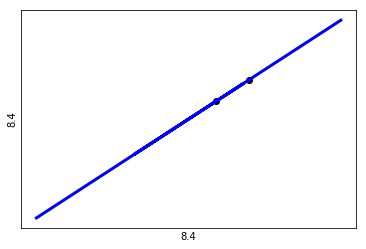

In [39]:
keep =[]
for targetx in targets:     #loop over all rows
        
        for targety in targets:    #loop over all rows except the one we're in now
            
            # Split the data into training/testing sets
            targets_X_train = final_t_shuffled[targetx][:-6]
            print(type(targets_X_train))
            targets_X_train = targets_X_train.reshape(-1, 1)
            print("Train var", targets_X_train, type(targets_X_train))
            targets_X_valid = final_t_shuffled[targetx][-6:].reshape(-1, 1) 
            print("Validation var", targets_X_valid, type(targets_X_valid))
        
            # Split the data into training/testing sets
            targets_Y_train = final_t_shuffled[targety][:-6].reshape(-1, 1)
            print("Train target", targets_Y_train, type(targets_Y_train))
            targets_Y_valid = final_t_shuffled[targety][-6:].reshape(-1, 1)
            print("Validation target", targets_Y_valid, type(targets_Y_valid))

            # use mask to account for nan values

            mask_train = ~np.isnan(targets_X_train) & ~np.isnan(targets_Y_train)

            targets_X_train = targets_X_train[mask_train]
            targets_Y_train = targets_Y_train[mask_train]


            mask_valid = ~np.isnan(targets_X_valid) & ~np.isnan(targets_Y_valid)

            targets_X_valid = targets_X_valid[mask_valid].reshape(-1, 1)
            targets_Y_valid = targets_Y_valid[mask_valid].reshape(-1, 1)
                                              

            # do not consider NaN pairs

            if (len(targets_X_train) > 1 and len(targets_X_valid) > 1):

                targets_X_train = targets_X_train.reshape(-1, 1)
                targets_Y_train = targets_Y_train.reshape(-1, 1)

                linreg = linear_model.LinearRegression()
                linreg.fit(targets_X_train, targets_Y_train)

                # Make predictions using the testing set
                targets_y_pred = linreg.predict(targets_X_valid)

                #linreg.fit([final_t[targetx]], [final_t[targety]])

                plt.scatter(targets_X_train, targets_Y_train,  color='black')
                plt.plot(targets_X_valid, targets_y_pred, color='blue', linewidth=3)

                plt.xticks(())
                plt.yticks(())
                plt.xlabel(targetx)
                plt.ylabel(targety)
                plt.show()

#print(keep)
        

In [ ]:
# @Galina: look what I found
def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rae = np.sum(np.abs(predicted - trues)) / np.sum(np.abs(trues - np.mean(trues)))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    return corr, mae, rae, rmse, r2

In [ ]:
corr, mae, rae, rmse, r2 = compute_error(y_mis1, y_hat)
print("CorrCoef: %.3f\nMAE: %.5f\nRMSE: %.5f\nR2: %.3f" % (corr, mae, rmse, r2))

what needs to be done before

In [ ]:
# convert data to a matrix
y = df.as_matrix()
y = y[:(6*24*1)]
N, D = y.shape
print("N=%d, D=%d" % (N,D))

In [ ]:
missing_perc = 0.8 # missing percentage

perm1 = np.random.permutation(N)
ix_mis1 = perm1[:int(missing_perc * N)] # missing indexes
ix_obs1 = perm1[int(missing_perc * N):] # observed indexes
y_mis1 = y[ix_mis1,7]
y_obs1 = y[ix_obs1,7]

perm2 = np.random.permutation(N)
ix_mis2 = perm2[:int(missing_perc * N)] # missing indexes
ix_obs2 = perm2[int(missing_perc * N):] # observed indexes
y_mis2 = y[ix_mis2,8]
y_obs2 = y[ix_obs2,8]

N_obs = len(ix_obs1)
N_mis = len(ix_mis1)
print("N_obs:", N_obs)
print("N_mis:", N_mis)

## Define STAN model

In [ ]:
SDG_STAN="""
data {
    int<lower = 0> N_obs;    // we might need such a variable for each observed variable because they could be different
    int<lower = 0> N_mis;    // how many do we want to infer
    int<lower = 1, upper = N_obs + N_mis> ix_obs1[N_obs];    // index for observed variable 1
    int<lower = 1, upper = N_obs + N_mis> ix_mis1[N_mis];
    int<lower = 1, upper = N_obs + N_mis> ix_obs2[N_obs];    // index for observed variable 2 -> more?
    int<lower = 1, upper = N_obs + N_mis> ix_mis2[N_mis];
    real y_obs1[N_obs];         // observed time-series data for variable 1
    real y_obs2[N_obs];         // observed time-series data for variable 2
}
parameters {
    vector[1] beta[2];            // state transition coefficients
    corr_matrix[2] Omega;    // 2 because of two observed variables -> in our case 
    vector<lower=0>[2] tau;
    real<lower=0> sigma;       // observation noise
    matrix[T,2] z;             // vector of latent states
    real y_mis1[N_mis];        // missing time-series data (to infer)
    real y_mis2[N_mis];        // missing time-series data (to infer)
}
model {
    for(i in 1:2)                   // 2 again because of two observed variables
        beta[i] ~ normal(0,1);            // prior on the auto-regressive coefficients
    tau ~ cauchy(0,1);
    Omega ~ lkj_corr(10.0);         // STAN manual Section 63.1  
    sigma ~ cauchy(0,1);            // prior on the variance
    
    z[1,:] ~ normal(0,1);           // prior on first state
    for(t in 2:T) {
        vector[2] mu;
        mu[1] = beta[1]' * z[(t-1):(t-1),1];
        mu[2] = beta[2]' * z[(t-1):(t-1),2];
        z[t,:] ~ multi_normal(mu, quad_form_diag(Omega, tau)); // latent dynamics
    }
    
    y1 ~ normal(z[:,1], sigma);    // likelihood
    y2 ~ normal(z[:,2], sigma);    // likelihood
}
"""

In [ ]:
# prepare data for STAN model
data = {'N_obs': N_obs, 'N_mis': N_mis, 
        'ix_obs1': ix_obs1+1, 'ix_mis1': ix_mis1+1, 'y_obs1': y_obs1, 
        'ix_obs2': ix_obs2+1, 'ix_mis2': ix_mis2+1, 'y_obs2': y_obs2}

In [ ]:
%%time
# create STAN model object (compile STAN model)
sm = pystan.StanModel(model_code=SDG_STAN)

In [ ]:
# run inference using MCMC sampling
fit = sm.sampling(data=data, iter=500, chains=4, algorithm="NUTS", seed=42, verbose=True)
print(fit)

In [ ]:
samples = fit.extract(permuted=True)  # return a dictionary of arrays

In [ ]:
fit.plot(["tau","sigma","lp__"])
plt.show()

#### Compute mean and standard devitions for the imputed values of the time-series and visualize them (in comparison with the corresponding true values):

In [ ]:
# get mean and standard devitions for predictions
y_hat = samples["y_mis1"].mean(axis=0)
y_std = samples["y_mis1"].std(axis=0)

In [ ]:
plt.plot(ix_obs1, y_obs1, "bo")
plt.plot(ix_mis1, y_mis1, "bx")
plt.plot(ix_mis1, y_hat, "rx")
#plt.plot(ix_mis, y_hat + y_std, "r--")
#plt.plot(ix_mis, y_hat - y_std, "r--")
plt.legend(["true","forecast","forecast + stddev","forecast - stddev"])

Compute error statistics of the model's imputations:

In [ ]:
# insert def compute_error if deleted above
corr, mae, rae, rmse, r2 = compute_error(y_mis1, y_hat)
print("CorrCoef: %.3f\nMAE: %.5f\nRMSE: %.5f\nR2: %.3f" % (corr, mae, rmse, r2))